In [5]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

# Reading in the data

In [6]:
X_train = pd.read_csv("../data/X_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_train = pd.read_csv("../data/y_train.csv")
y_test = pd.read_csv("../data/y_test.csv")

# Wrapper functions

This function calculates and returns / displays the accuracy score, F1 score, classification report, and confusion matrix of a given model.

In [7]:
def evaluate_classification_method(mod):
    y_pred = mod.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")
    labels = ["Dropout", "Enrolled", "Graduate"]
    full_report = classification_report(y_test, y_pred, target_names=labels)

    print(f"Accuracy classification score: {accuracy}")
    print(f"F1 score: {f1}")
    print(full_report)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    return accuracy, f1, full_report, cm

# Naive-Bayes Classifier

Accuracy classification score: 0.7005649717514124
F1 score: 0.7256338352996544
              precision    recall  f1-score   support

     Dropout       0.79      0.68      0.73       284
    Enrolled       0.32      0.17      0.22       151
    Graduate       0.72      0.89      0.79       450

    accuracy                           0.70       885
   macro avg       0.61      0.58      0.58       885
weighted avg       0.67      0.70      0.68       885



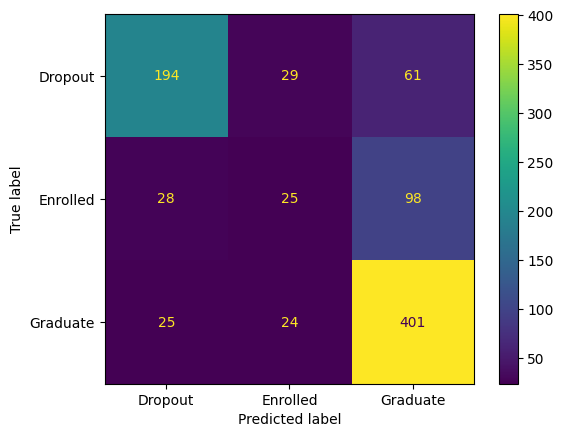

In [8]:
naive_bayes = GaussianNB().fit(X_train, y_train.values.ravel())
nb_accuracy, nb_f1, nb_full_report, nb_cm = evaluate_classification_method(naive_bayes)

Based on the relatively high accuracy and F-1 scores alone, our model seems to perform quite well.

However, when we break the model down based on its ability to correct identify each class, we notice that the model excels at classifying dropouts and graduates, but not enrolled students. This may be partially due to class imbalance, as we saw previously that enrolled students took up the smallest proportion of our dataset. They are likely to be easily confused with students who graduate too, since one can only graduate _after_ being enrolled for some time.

The confusion matrix similarly reflects this trend. Most enrolled students are mistakenly classified as belonging to the Graduate class.

# LDA

Accuracy classification score: 0.7717514124293785
F1 score: 0.7853986610137063
              precision    recall  f1-score   support

     Dropout       0.86      0.67      0.75       284
    Enrolled       0.52      0.38      0.44       151
    Graduate       0.79      0.97      0.87       450

    accuracy                           0.77       885
   macro avg       0.72      0.67      0.69       885
weighted avg       0.77      0.77      0.76       885



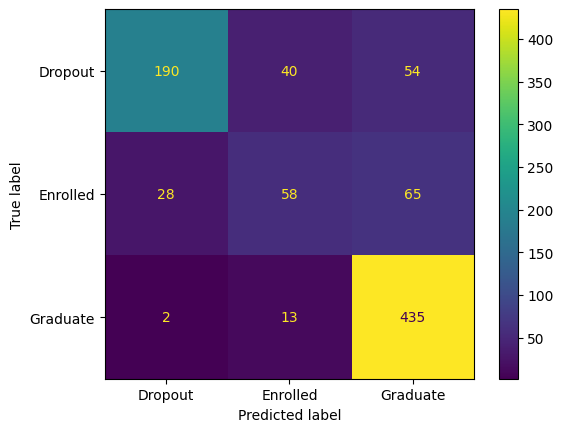

In [9]:
lda = LinearDiscriminantAnalysis(shrinkage=None).fit(X_train, y_train.values.ravel())
lda_accuracy, lda_f1, lda_full_report, lda_cm = evaluate_classification_method(lda)

LDA suffers from the same issue of misclassifying enrolled students as graduated students, but the number of such misclassifications is significantly lower. LDA is also better at classifying graduated students, though a little worse at classifying students who dropped out.

# QDA

Accuracy classification score: 0.7367231638418079
F1 score: 0.7470434598969076
              precision    recall  f1-score   support

     Dropout       0.79      0.70      0.74       284
    Enrolled       0.42      0.33      0.37       151
    Graduate       0.78      0.90      0.84       450

    accuracy                           0.74       885
   macro avg       0.66      0.64      0.65       885
weighted avg       0.72      0.74      0.73       885



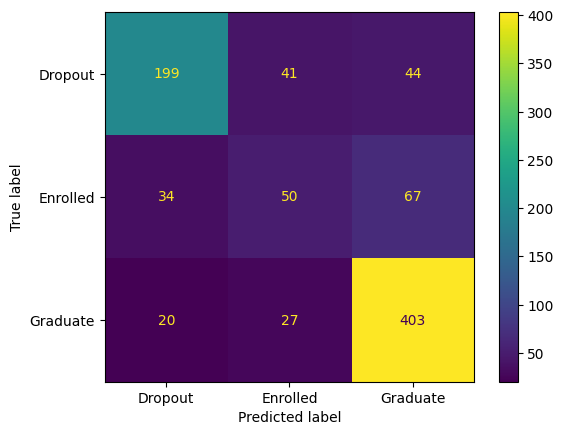

In [10]:
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train.values.ravel())
qda_accuracy, qda_f1, qda_full_report, qda_cm = evaluate_classification_method(qda)

QDA faces the same issue of misclassifying enrolled students as students who have graduated. It does, however, perform the best in classifying students who dropped out.

# Comparison across models

For ease of reference, we display the accuracy and F1 scores of all methods considered here together.

In [11]:
accuracies = [nb_accuracy, lda_accuracy, qda_accuracy]
f1_scores = [nb_f1, lda_f1, qda_f1]
models = ["Naive Bayes", "LDA", "QDA"]

pd.DataFrame(
    {
        "Model": models,
        "Accuracy": [round(i, 3) for i in accuracies],
        "F1 Score": [round(i, 3) for i in f1_scores],
    }
)

,Model,Accuracy,F1 Score
0,Naive Bayes,0.701,0.726
1,LDA,0.772,0.785
2,QDA,0.737,0.747


LDA has the highest accuracy and F1 scores, followed by QDA and Naive Bayes. This is expected as the Naive Bayes classifier assumes that predictors are conditionally independent, which is unlikely to be the case: for instance, one's parents' qualifications are likely to be related to one's parents' occupations, since qualifications somewhat determine the kinds of careers one can break into.